.. _nb_perm:

# Permutations

Permutations are a very particular type where each integer value occurs only once. Your algorithm to solve your optimization problem efficiently might need some customization regarding the evolutionary operators. 

In the following, two examples of permutation problems shall be provided.

## Traveling Salesman Problem (TSP)

The traditional traveling salesman problem aims to minimize the time to travel to visit each city exactly once. 
Since a permutation can start with an arbitrary number, it is advisable to avoid oranges with apples and to repair each individual to start with the index `0`. Therefore, let us define a `Repair` operator as follows: 

In [1]:
import numpy as np
from pymoo.core.repair import Repair

class StartFromZeroRepair(Repair):

    def _do(self, problem, X, **kwargs):
        I = np.where(X == 0)[1]

        for k in range(len(X)):
            i = I[k]
            X[k] = np.concatenate([X[k, i:], X[k, :i]])

        return X

For permutations, the corresponding operators need to be supplied to the `GA` constructor. Here, we choose random permutations, edge recombination crossover, and inversion mutation. Also, the repair defined above is provided.
The termination is defined to consider the improvement of the last 200 generations. If the improvement is above a tolerance value (default: `f_tol=1e-6`), the algorithm is considered as terminated.

In [2]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.problems.single.traveling_salesman import create_random_tsp_problem
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination

problem = create_random_tsp_problem(30, 100, seed=1)

algorithm = GA(
    pop_size=20,
    sampling=PermutationRandomSampling(),
    mutation=InversionMutation(),
    crossover=OrderCrossover(),
    repair=StartFromZeroRepair(),
    eliminate_duplicates=True
)

# if the algorithm did not improve the last 200 generations then it will terminate (and disable the max generations)
termination = DefaultSingleObjectiveTermination(period=200, n_max_gen=np.inf)

res = minimize(
    problem,
    algorithm,
    termination,
    seed=1,
)

In [3]:
print("Traveling Time:", np.round(res.F[0], 3))
print("Function Evaluations:", res.algorithm.evaluator.n_eval)

Traveling Time: 486.53
Function Evaluations: 4020


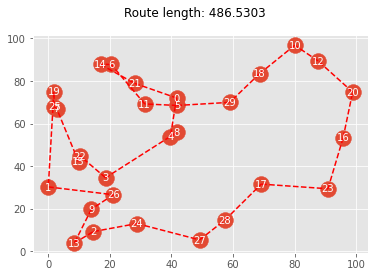

In [4]:
from pymoo.problems.single.traveling_salesman import visualize
visualize(problem, res.X)

## Flowshop Schedule

This problem is purely optimizing the permutations, and the initial value is not of importance.

In [5]:
from pymoo.problems.single.flowshop_scheduling import create_random_flowshop_problem


problem = create_random_flowshop_problem(n_machines=5, n_jobs=10, seed=1)

algorithm = GA(
    pop_size=20,
    eliminate_duplicates=True,
    sampling=PermutationRandomSampling(),
    mutation=InversionMutation(),
    crossover=OrderCrossover()
)

termination = DefaultSingleObjectiveTermination(period=50, n_max_gen=10000)


res = minimize(
    problem,
    algorithm,
    termination,
    seed=1
)

In [6]:
print("Maximum Span:", np.round(res.F[0], 3))
print("Function Evaluations:", res.algorithm.evaluator.n_eval)

Maximum Span: 1044.384
Function Evaluations: 1280


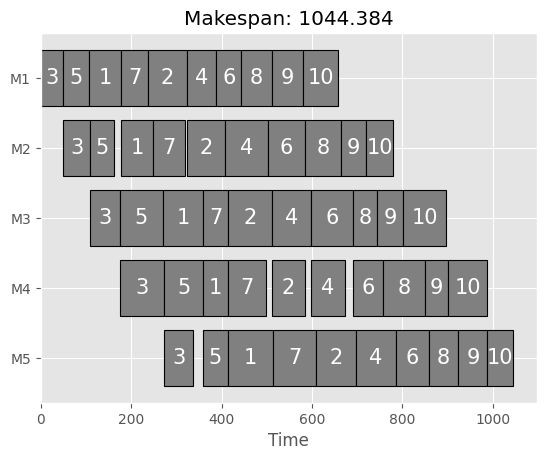

In [7]:
from pymoo.problems.single.flowshop_scheduling import visualize
visualize(problem, res.X)

<sub>This implementation is based on a contribution made by [Peng-YM](https://github.com/Peng-YM).</sub>